## COMMON KERNEL FUNCTIONS

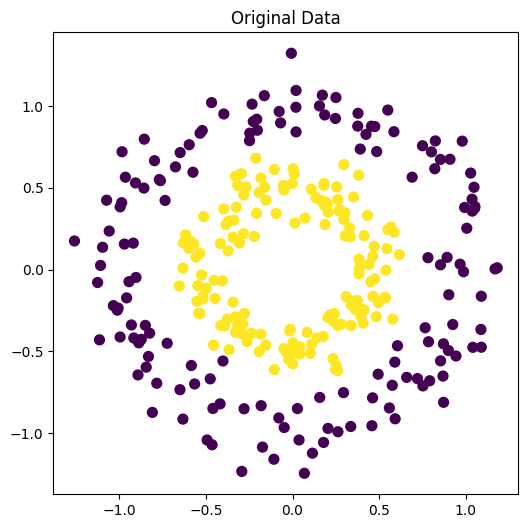

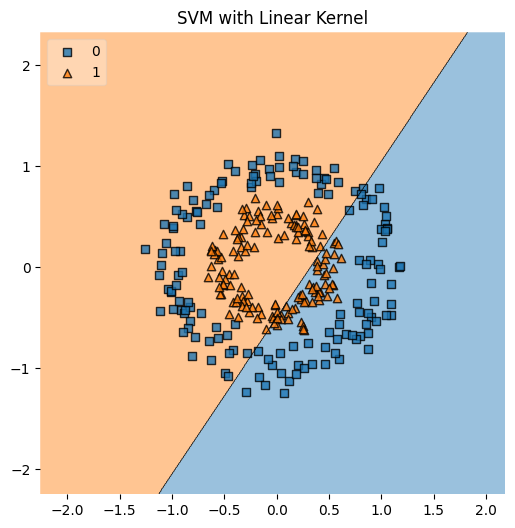

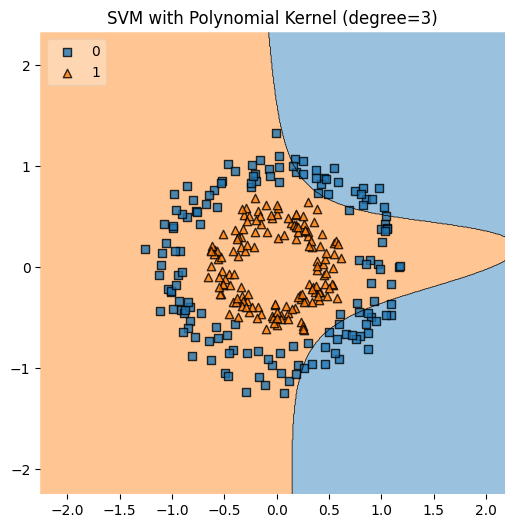

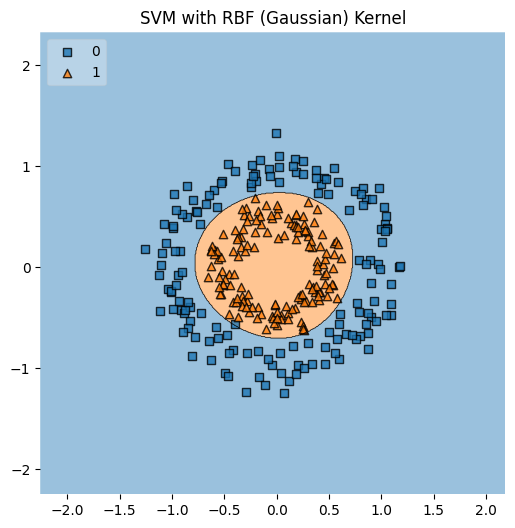

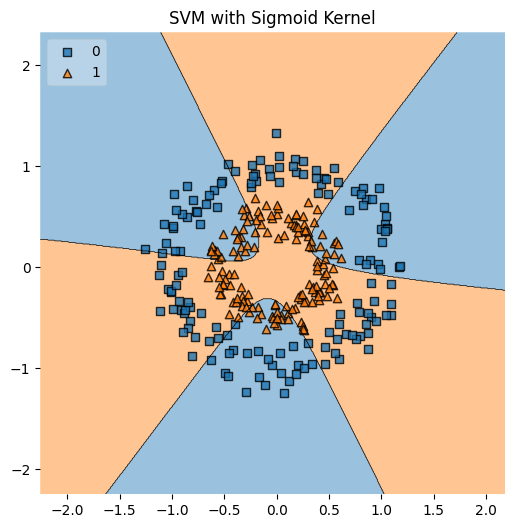

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_moons
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from mlxtend.plotting import plot_decision_regions

# Step 1: Generate toy datasets
X, y = make_circles(n_samples=300, factor=0.5, noise=0.1)

# Step 2: Visualize original data
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50)
plt.title("Original Data")
plt.show()

# Step 3: Function to plot decision boundaries for different kernels
def plot_svm_kernel(kernel_type, X, y, title):
    model = make_pipeline(StandardScaler(), SVC(kernel=kernel_type))
    model.fit(X, y)

    # Plot the decision boundary
    plt.figure(figsize=(6, 6))
    plot_decision_regions(X, y, clf=model, legend=2)
    plt.title(title)
    plt.show()

# Step 4: Linear Kernel
plot_svm_kernel('linear', X, y, 'SVM with Linear Kernel')
# Equation: K(x, y) = x . y

# Step 5: Polynomial Kernel
plot_svm_kernel('poly', X, y, 'SVM with Polynomial Kernel (degree=3)')
# Equation: K(x, y) = (γ * (x . y) + r)^d

# Step 6: RBF Kernel
plot_svm_kernel('rbf', X, y, 'SVM with RBF (Gaussian) Kernel')
# Equation: K(x, y) = exp(-γ ||x - y||^2)

# Step 7: Sigmoid Kernel
plot_svm_kernel('sigmoid', X, y, 'SVM with Sigmoid Kernel')
# Equation: K(x, y) = tanh(γ * (x . y) + r)


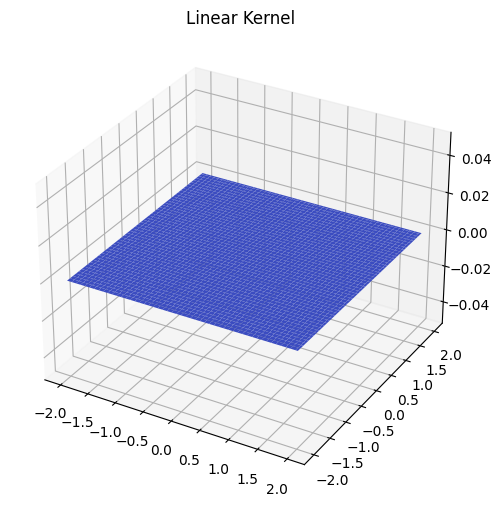

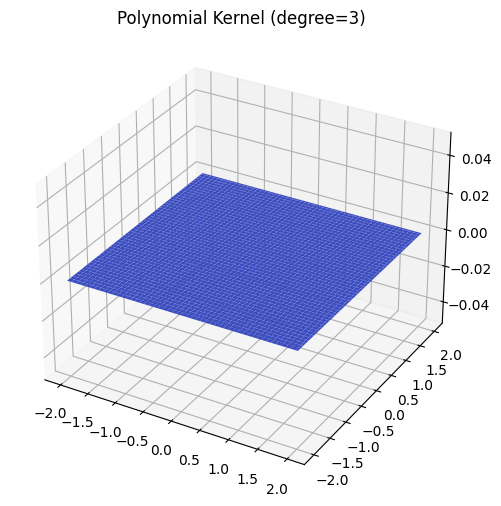

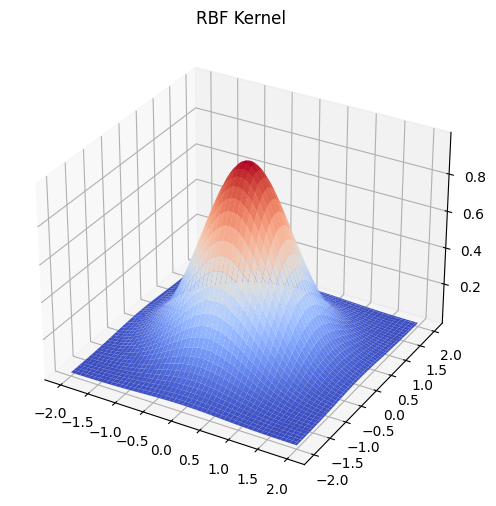

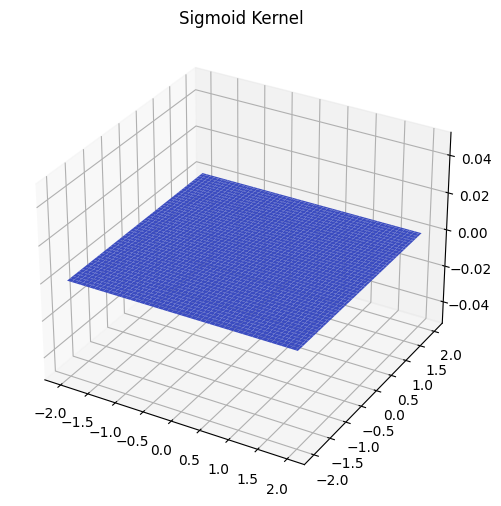

In [2]:
# Import necessary libraries for 3D plotting
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Step 1: Kernel function plot for Linear, Polynomial, RBF, and Sigmoid kernels
def plot_kernel_function(kernel_func, X, title):
    xx, yy = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    kernel_values = kernel_func(xy, X).reshape(xx.shape)

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(xx, yy, kernel_values, cmap=cm.coolwarm, edgecolor='none')
    ax.set_title(title)
    plt.show()

# Step 2: Define kernel functions
def linear_kernel(X, Y):
    return np.dot(X, Y.T)

def polynomial_kernel(X, Y, degree=3, gamma=1, r=0):
    return (gamma * np.dot(X, Y.T) + r) ** degree

def rbf_kernel(X, Y, gamma=1):
    pairwise_sq_dists = np.sum((X[:, None] - Y) ** 2, axis=2)
    return np.exp(-gamma * pairwise_sq_dists)

def sigmoid_kernel(X, Y, gamma=1, r=0):
    return np.tanh(gamma * np.dot(X, Y.T) + r)

# Step 3: Plot each kernel function
X_sample = np.array([[0, 0]])

# Linear Kernel Plot
plot_kernel_function(lambda X, Y: linear_kernel(X, Y), X_sample, "Linear Kernel")

# Polynomial Kernel Plot
plot_kernel_function(lambda X, Y: polynomial_kernel(X, Y, degree=3), X_sample, "Polynomial Kernel (degree=3)")

# RBF Kernel Plot
plot_kernel_function(lambda X, Y: rbf_kernel(X, Y, gamma=1), X_sample, "RBF Kernel")

# Sigmoid Kernel Plot
plot_kernel_function(lambda X, Y: sigmoid_kernel(X, Y, gamma=1, r=0), X_sample, "Sigmoid Kernel")


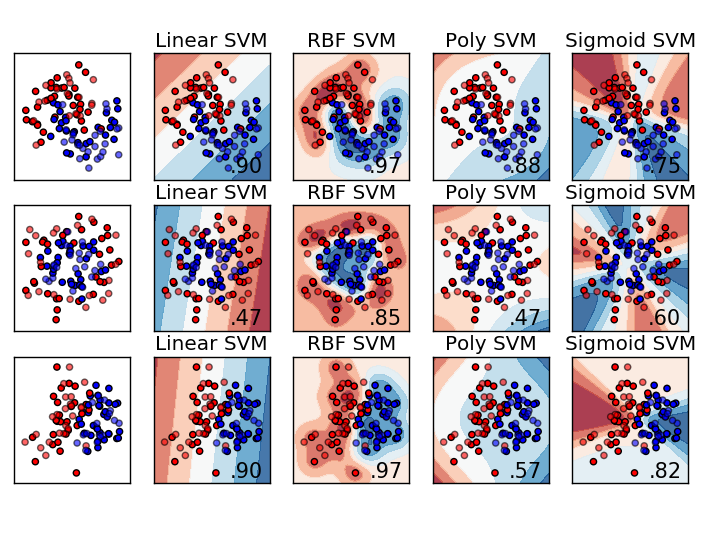